In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('../resource_files/TotalServiceMiles_2020.csv')
df

,Route,RouteName,Class,ServiceType,ScheduledMiles,AVLRevenueMiles,AVLDeadHeadMiles,AVLExemptMiles,AVLMilesAdjustments,ServiceDate
0,2,2-BLANCO RD.,Major Radial,SUNDAY,924.35,886.97,46.91,0.0,26.0,1/1/2019
1,3,3-SAN PEDRO SKIP,Major Limited,SUNDAY,707.88,683.66,19.57,0.0,0.0,1/1/2019
2,4,4-SAN PEDRO,Major Radial,SUNDAY,731.48,692.08,34.76,0.0,0.0,1/1/2019
3,5,5-MC CULLOUGH,Major Radial,SUNDAY,484.17,457.37,22.12,0.0,0.0,1/1/2019
4,6,6-US 281 Express,Major Express,SUNDAY,0.00,0.00,0.00,0.0,0.0,1/1/2019
...,...,...,...,...,...,...,...,...,...,...
63617,7352,735 - Northside Stadium,Other Special Event,SUNDAY,0.00,0.00,0.00,0.0,0.0,5/3/2020
63618,7353,735 - Northside Stadium / Alamodome,Dome Special Event,SUNDAY,0.00,0.00,0.00,0.0,0.0,5/3/2020
63619,7502,750 - Shuttle,Other Special Event,SUNDAY,0.00,0.00,0.00,0.0,0.0,5/3/2020
63620,7503,750 Downtown Shuttle / Alamodome,Dome Special Event,SUNDAY,0.00,0.00,0.00,0.0,0.0,5/3/2020


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63622 entries, 0 to 63621
Data columns (total 10 columns):
Route                  63622 non-null int64
RouteName              63622 non-null object
Class                  62115 non-null object
ServiceType            63622 non-null object
ScheduledMiles         63622 non-null float64
AVLRevenueMiles        63622 non-null float64
AVLDeadHeadMiles       63622 non-null float64
AVLExemptMiles         63622 non-null float64
AVLMilesAdjustments    63622 non-null float64
ServiceDate            63622 non-null object
dtypes: float64(5), int64(1), object(4)
memory usage: 4.9+ MB


In [22]:
df.head()

,Route,RouteName,Class,ServiceType,ScheduledMiles,AVLRevenueMiles,AVLDeadHeadMiles,AVLExemptMiles,AVLMilesAdjustments,ServiceDate
0,2,2-BLANCO RD.,Major Radial,SUNDAY,924.35,886.97,46.91,0.0,26.0,1/1/2019
1,3,3-SAN PEDRO SKIP,Major Limited,SUNDAY,707.88,683.66,19.57,0.0,0.0,1/1/2019
2,4,4-SAN PEDRO,Major Radial,SUNDAY,731.48,692.08,34.76,0.0,0.0,1/1/2019
3,5,5-MC CULLOUGH,Major Radial,SUNDAY,484.17,457.37,22.12,0.0,0.0,1/1/2019
4,6,6-US 281 Express,Major Express,SUNDAY,0.00,0.00,0.00,0.0,0.0,1/1/2019


In [52]:
df.ServiceDate = pd.to_datetime(df.ServiceDate)
df['Day'] = df.ServiceDate.dt.strftime('%a')

In [87]:
cats = df.Day.unique()

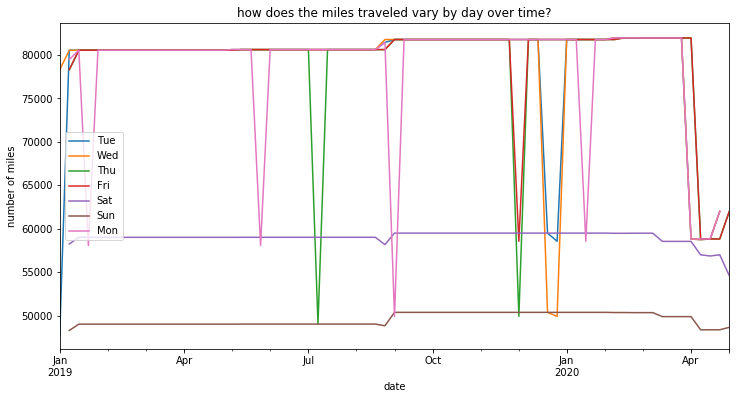

In [96]:
plt.figure(figsize = (12,6))
for cat in cats:
    df [df.Day == cat].groupby('ServiceDate').sum().ScheduledMiles.plot()
plt.legend(cats)
plt.title('how does the miles traveled vary by day over time?')
plt.xlabel('date')
plt.ylabel('number of miles')
plt.show()

In [59]:
df.groupby(['ServiceDate','Day']).sum()

,,Route,ScheduledMiles,AVLRevenueMiles,AVLDeadHeadMiles,AVLExemptMiles,AVLMilesAdjustments
ServiceDate,Day,,,,,,
2019-01-01,Tue,246154,47834.73,44476.38,3549.75,0.0,-373.7
2019-01-02,Wed,247054,78299.24,70582.84,7211.54,0.0,105.0
2019-01-03,Thu,247054,78299.24,70545.03,7269.94,0.0,691.0
2019-01-04,Fri,247054,78299.24,70588.64,7308.36,6.0,174.0
2019-01-05,Sat,246154,58242.23,54426.11,4490.05,0.0,1219.0
...,...,...,...,...,...,...,...
2020-04-29,Wed,245245,61992.54,56579.18,4779.27,0.0,0.0
2020-04-30,Thu,245245,61992.54,56782.08,4773.78,0.0,0.0
2020-05-01,Fri,245245,61992.54,56524.69,4856.79,0.0,0.0


In [55]:
df.groupby(['Day']).mean().ScheduledMiles

Day
Fri    599.781014
Mon    590.934315
Sat    448.396500
Sun    376.592648
Thu    595.383707
Tue    595.000710
Wed    596.340273
Name: ScheduledMiles, dtype: float64